# Uppgift 1 - uppvärmning covid-19 data

In [143]:
import pandas as pd
import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt

# setting up file variables
file_path = "Data/Folkhalsomyndigheten_Covid19.xlsx"
sheet = "Veckodata Riket"

# reading file to a dataframe
df = pd.read_excel(file_path, sheet_name = sheet)

df.head()


,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


---
## a) Initial data analysis

In [144]:
df["år"].unique() # representing years 2020 through 2022

array([2020, 2021, 2022], dtype=int64)

In [145]:
len(df) # 142 weeks, as long as there are no nan values

142

In [146]:
df.info() # datatypes are all numbers, not missing any values, looks good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

In [147]:
df.describe()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
count,142.000000,142.000000,142.000000,142.000000,142.000000,1.420000e+02,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,2020.957746,26.035211,18378.345070,177.197183,354.169014,1.125288e+06,10843.281690,67.176056,6000.464789,144.936620,14.000000,12321.154930,1187.840841
std,0.797809,14.228835,38569.455753,371.689114,725.677174,9.618084e+05,9265.100705,73.435000,3076.853993,173.659331,16.796551,6103.235009,587.255605
min,2020.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,14.000000,3075.000000,30.000000,59.750000,1.014860e+05,982.500000,14.000000,2643.750000,25.250000,2.425000,5880.000000,569.375000
50%,2021.000000,26.000000,5531.000000,53.000000,107.500000,1.085848e+06,10461.500000,27.500000,7559.500000,77.500000,7.450000,14610.500000,1407.650024
75%,2022.000000,37.750000,21125.000000,203.500000,421.250000,2.423603e+06,23350.500000,109.000000,8863.250000,185.500000,17.950000,17177.750000,1654.999969
max,2022.000000,53.000000,265043.000000,2554.000000,5024.000000,2.609725e+06,25144.000000,289.000000,9539.000000,664.000000,64.300003,20581.000000,1982.900024


---
## b) add columns "år" and "veckonummer" to a column "vecka" in the following format: YYYYvW


In [148]:
# creating new column "Vecka" of strings from "år" and "veckonummer" separated by "v", and inserting it at position 0 of the dataframe
df.insert(0, "Vecka", df["år"].astype(str) + "v" + df["veckonummer"].astype(str)) # taking column values as string in order to get the correct datatype
df.drop(['år', 'veckonummer'], axis = 1, inplace = True)
df.head() # results in column with format YYYYvW

,Vecka,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020v6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020v7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020v8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020v9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020v10,211,2,2,225,2,3,3,0,0.0,0,0.0


---
Using both Seaborn and Plotly Express:  
c) Draw a line chart of deceased per week from 2020v6 until present  
d) Draw a line chart of new cases per week from 2020v6 until present  
e) Draw a line chart of deceased per week and new cases per week from 2020v6 until present  
f) Draw a line chart of cumulative amount cases from 2020v6 until present

In [149]:
df.head(1)

,Vecka,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020v6,1,0,0,1,0,0,0,0,0.0,0,0.0


In [150]:
# renaming columns to be more easily used in plotting for more readable code
df.rename(columns = {"Antal_fall_vecka": "Antal Fall",
"Antal_avlidna_vecka": "Antal Avlidna",
"Kum_antal_fall": "Kumulativt Antal Fall"
}, inplace = True)
df

,Vecka,Antal Fall,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kumulativt Antal Fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal Avlidna,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020v6,1,0,0,1,0,0,0,0,0.0,0,0.000000
1,2020v7,0,0,0,1,0,0,0,0,0.0,0,0.000000
2,2020v8,0,0,0,1,0,0,0,0,0.0,0,0.000000
3,2020v9,13,0,0,14,0,0,0,0,0.0,0,0.000000
4,2020v10,211,2,2,225,2,3,3,0,0.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
137,2022v38,4669,45,93,2585507,24910,22,9475,88,8.5,20303,1956.099976
138,2022v39,13532,130,175,2599039,25041,15,9490,92,8.9,20395,1965.000000
139,2022v40,3999,39,169,2603038,25079,19,9509,88,8.5,20483,1973.400024
140,2022v41,3408,33,72,2606446,25112,13,9522,73,7.0,20556,1980.500000


## 2x2 plot using Seaborn

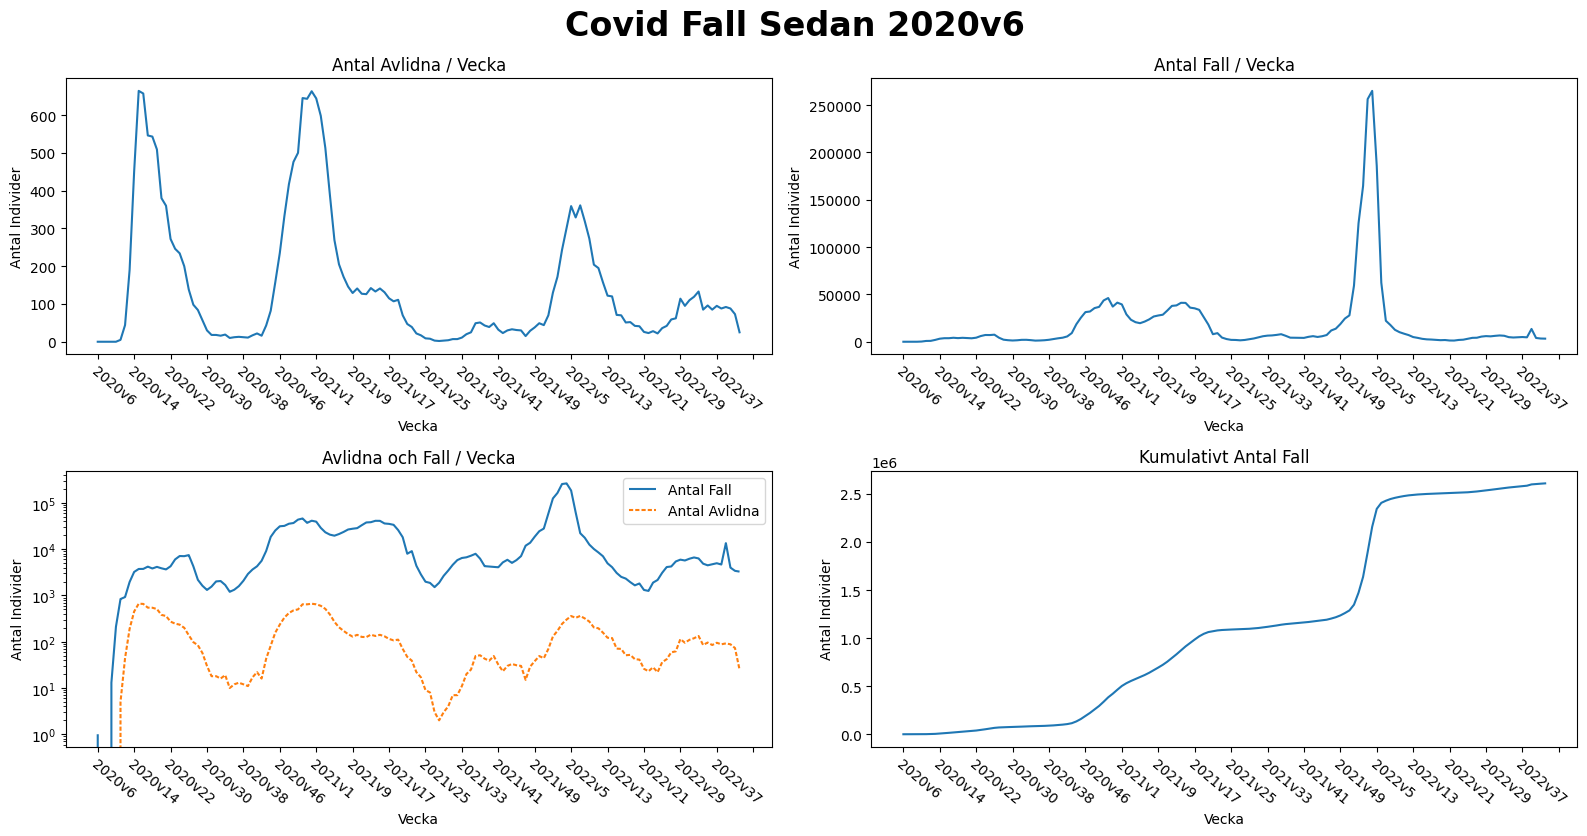

In [171]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

titles = {
    "Antal Avlidna / Vecka": "Antal Avlidna",
    "Antal Fall / Vecka": "Antal Fall",
    "Avlidna och Fall / Vecka": ["Antal Fall", "Antal Avlidna"],
    "Kumulativt Antal Fall": "Kumulativt Antal Fall",
}

for ax, (title, series) in zip(axes.flatten(), titles.items()):
    if isinstance(series, list):
        for i, serie in enumerate(
            series
        ):  # i used for ensuring different visuals of each graph input
            sns.lineplot(df, x="Vecka", y=serie, ax=ax, label=serie, dashes=[i + 1, i])
        ax.set_yscale("log")
    else:
        sns.lineplot(df, x="Vecka", y=series, ax=ax)

    ax.set_title(title)
    ax.set_ylabel("Antal Individer")
    ax.xaxis.set_major_locator(plt.MaxNLocator(20))  # showing 20 tick labels
    ax.xaxis.set_tick_params(
        rotation=-40
    )  # draws ticks at bottom of x axis with rotation
    plt.setp(
        ax.get_xticklabels(), ha="left", rotation_mode="anchor"
    )  # anchor left part of label to tick

fig.tight_layout()
fig.suptitle("Covid Fall Sedan 2020v6", fontsize=24, fontweight="bold", y=1.04);


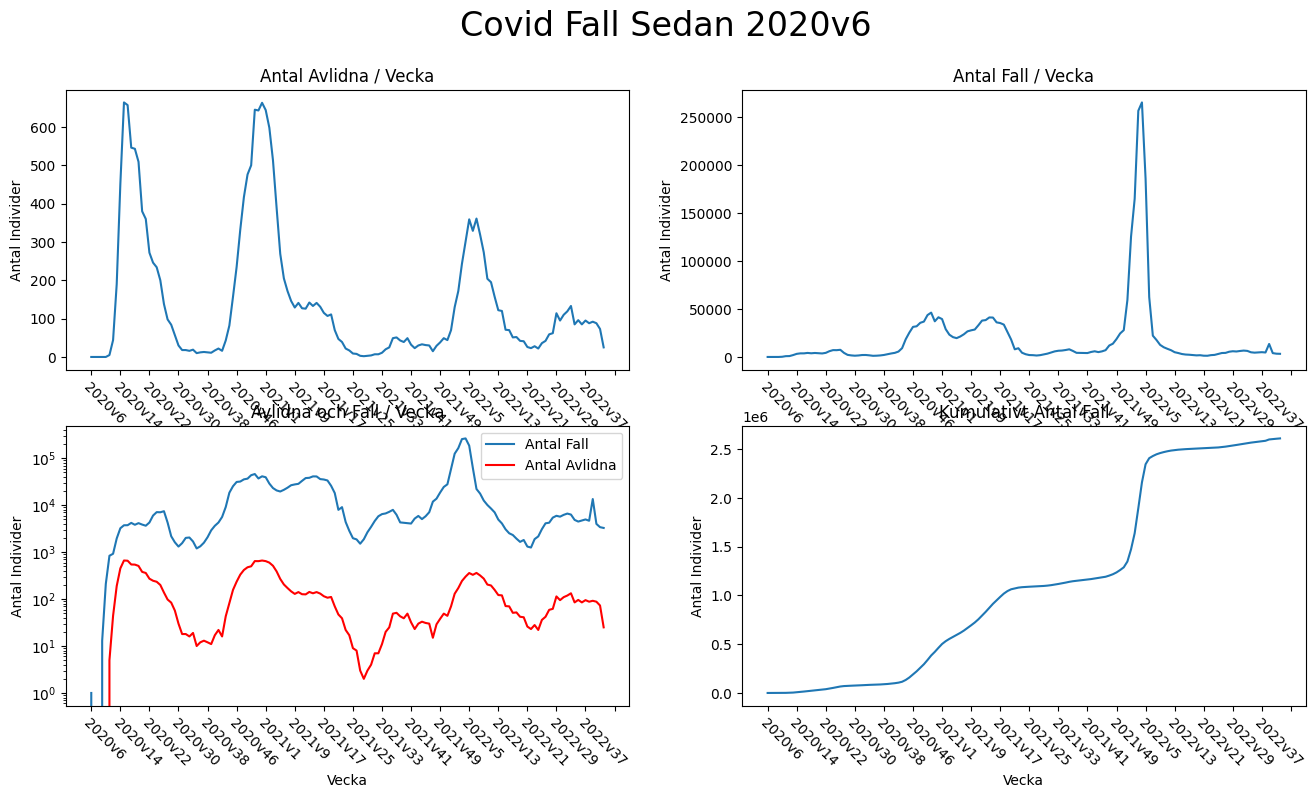

In [ ]:
fig, axes = plt.subplots(2,2, figsize = (16, 8), constrained_layout = False)

titles = ["Antal Avlidna / Vecka", "Antal Fall / Vecka", "Avlidna och Fall / Vecka", "Kumulativt Antal Fall"]
y_lables = ["Antal Individer"] * 4

sns.lineplot(df, x = "Vecka", y = "Antal_avlidna_vecka", ax = axes[0, 0])
sns.lineplot(df, x = "Vecka", y = "Antal_fall_vecka", ax = axes[0, 1])
sns.lineplot(df, x = "Vecka", y = "Antal_fall_vecka", ax = axes[1, 0], label = "Antal Fall")
sns.lineplot(df, x = "Vecka", y = "Antal_avlidna_vecka", ax = axes[1, 0], label = "Antal Avlidna", color = "red")
axes[1, 0].set_yscale('log')
sns.lineplot(df, x = "Vecka", y = "Kum_antal_fall", ax = axes[1, 1])

for ax, title, y_label in zip(axes.reshape(-1), titles, y_lables):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.xaxis.set_major_locator(plt.MaxNLocator(20)) # showing 20 tick labels
    ax.xaxis.set_tick_params(rotation=-45) # draws ticks at bottom of x axis with rotation
    plt.setp(ax.get_xticklabels(), ha="left", rotation_mode="anchor") # anchor left part of label to tick

fig.suptitle("Covid Fall Sedan 2020v6", fontsize = 24);
# TODO save fig

## Plotting with Plotly Express

In [167]:
px.line(df, x = "Vecka", y = "Antal Avlidna", title = "Antal Avlidna / Vecka")

In [ ]:
px.line(df, x = "Vecka", y = "Antal Fall", title = "Antal Fall / Vecka")

In [165]:
fig = px.line(
    df,
    x="Vecka",
    y=["Antal Fall", "Antal Avlidna"],
    log_y=True,
    title="Antal Avlidna och Fall / Vecka",
    labels={"value": "Antal Individer", "variable": ""}, # setting legend group name to "" since it speaks clearly for itself in this case
)
fig.update_traces(
    patch={"line": {"color": "orange", "dash": "dot"}}, # styling line to be orange dotted
    selector={"legendgroup": "Antal Avlidna"}, # specifying which line to apply style to
)


In [ ]:
px.line(df, x = "Vecka", y = "Kumulativt Antal Fall", title = "Kumulativt Antal Fall / Vecka")
